In [77]:
import pandas as pd
import re
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/justinkaufman/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Read in data

In [50]:
df=pd.read_csv("/Users/justinkaufman/Stats_101C/Final_Project/Data_Final")
df.drop(columns=['Unnamed: 0'], inplace=True)

In [51]:
df.head()

,User_id,Bus_id,Star,Useful,Cool,Funny,Review,State,City,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,Elite,User_Fans,Users_Ave_Star
0,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,5.0,0,0,0,"Great burgers,fries and salad! Burgers have a...",CA,Goleta,4.0,922,1687,694,1070,"2015,2016,2017,2018,2019,20,20,2021",51,4.20
1,JYYYKt6TdVA4ng9lLcXt_g,SZU9c8V2GuREDN5KgyHFJw,5.0,0,0,0,We were a bit weary about trying the Shellfish...,CA,Santa Barbara,4.0,338,800,144,353,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,...",30,4.12
2,Uk3X2AypU8AqvcYEVf7s6Q,eL4lyE7LNoXEMvpcJ8WNVw,3.0,5,0,0,This was a tough one! On the merits of the w...,CA,Santa Barbara,4.0,431,2126,1245,1476,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,...",76,4.05
3,LcqNuhqaYt5ekKzaRirmIg,SZU9c8V2GuREDN5KgyHFJw,5.0,2,1,0,"I love trying fresh seafood on piers, wharfs a...",CA,Santa Barbara,4.0,258,452,125,183,"2015,2016,2017",37,3.99
4,gasLVm0KRwrVhPGRcqATjw,CHh0ZFrQcsk4boOItr2Zuw,4.0,1,2,0,I stopped in because I was hungry for some sna...,CA,Carpinteria,3.0,1638,2658,933,2297,"2014,2015,2016,2017,2018,2019,20,20,2021",105,3.79


## Assign new column with cleaned up reviews

In [54]:
df['review_clean']=documents

In [55]:
df.head()

,User_id,Bus_id,Star,Useful,Cool,Funny,Review,State,City,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,Elite,User_Fans,Users_Ave_Star,review_clean
0,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,5.0,0,0,0,"Great burgers,fries and salad! Burgers have a...",CA,Goleta,4.0,922,1687,694,1070,"2015,2016,2017,2018,2019,20,20,2021",51,4.20,great burger fry and salad burger have hint of...
1,JYYYKt6TdVA4ng9lLcXt_g,SZU9c8V2GuREDN5KgyHFJw,5.0,0,0,0,We were a bit weary about trying the Shellfish...,CA,Santa Barbara,4.0,338,800,144,353,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,...",30,4.12,we were bit weary about trying the shellfish c...
2,Uk3X2AypU8AqvcYEVf7s6Q,eL4lyE7LNoXEMvpcJ8WNVw,3.0,5,0,0,This was a tough one! On the merits of the w...,CA,Santa Barbara,4.0,431,2126,1245,1476,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,...",76,4.05,this wa tough one on the merit of the wine fai...
3,LcqNuhqaYt5ekKzaRirmIg,SZU9c8V2GuREDN5KgyHFJw,5.0,2,1,0,"I love trying fresh seafood on piers, wharfs a...",CA,Santa Barbara,4.0,258,452,125,183,"2015,2016,2017",37,3.99,i love trying fresh seafood on pier wharf and ...
4,gasLVm0KRwrVhPGRcqATjw,CHh0ZFrQcsk4boOItr2Zuw,4.0,1,2,0,I stopped in because I was hungry for some sna...,CA,Carpinteria,3.0,1638,2658,933,2297,"2014,2015,2016,2017,2018,2019,20,20,2021",105,3.79,i stopped in because wa hungry for some snack ...


## EDA

<BarContainer object of 5 artists>

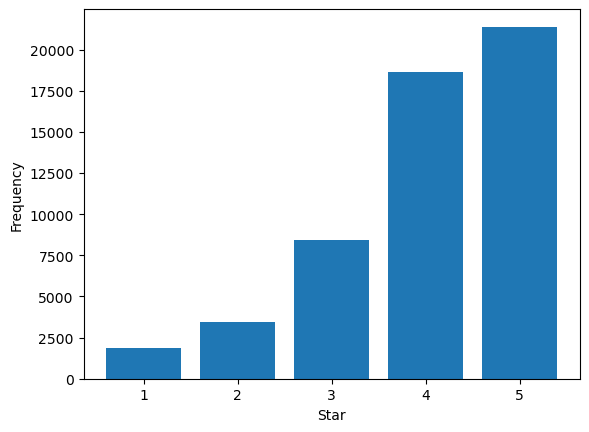

In [56]:
plt.xlabel('Star')
plt.ylabel('Frequency')
plt.bar([5,4,3,2,1], df.Star.value_counts())

In [57]:
df_temp=df.iloc[:,[2,3,4,5,9,10,11,12,13,15,16]]

<AxesSubplot:>

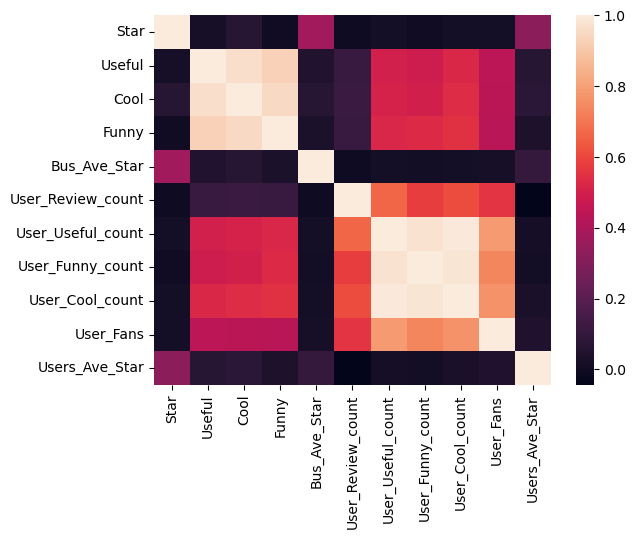

In [58]:
sns.heatmap(df_temp.corr())

In [59]:
# remove multicollinearity 
df_temp.drop(columns=['User_Funny_count','User_Cool_count', 'Cool', 'Funny'],inplace=True)

/var/folders/d0/r5_rt10j15j98xny820n56kw0000gp/T/ipykernel_79397/1588676529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.drop(columns=['User_Funny_count','User_Cool_count', 'Cool', 'Funny'],inplace=True)


In [60]:
X=df_temp.drop(columns='Star')
y=df_temp.Star

In [61]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Star   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     2558.
Date:                Wed, 23 Nov 2022   Prob (F-statistic):               0.00
Time:                        10:40:09   Log-Likelihood:                -72896.
No. Observations:               53845   AIC:                         1.458e+05
Df Residuals:                   53838   BIC:                         1.459e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.7058      0.04

In [63]:
df_temp.drop(columns=['User_Review_count'], inplace=True)

/var/folders/d0/r5_rt10j15j98xny820n56kw0000gp/T/ipykernel_79397/2459622554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.drop(columns=['User_Review_count'], inplace=True)


## Remove special characters and perform lemmatization

In [67]:
documents = []
X = df.Review
stemmer = WordNetLemmatizer()
for i in range(0, len(X)):
    # Remove all the special characters, like parathesis
    document = re.sub(r'\W', ' ', str(X[i]))
    # remove all single characters: like a, b, c, d
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    # Converting to Lowercase
    document = document.lower()
    # Lemmatization
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    documents.append(document)

In [68]:
vectorizer = CountVectorizer(max_features=1500, min_df=0.1, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents)

## Create df of word frequencies per user review and reduce dimensions

In [69]:
td = pd.DataFrame(X.todense()) 
td.columns = vectorizer.get_feature_names()

/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [70]:
td

,also,always,amazing,area,around,back,bar,barbara,best,better,...,thing,think,time,try,two,wa,want,way,well,would
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,6,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,3,0,1,1,1,1,0,1
3,1,0,0,0,0,0,0,0,0,1,...,1,0,2,0,0,14,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53840,1,0,0,0,0,0,0,0,0,0,...,1,0,1,3,4,2,3,0,1,0
53841,0,0,0,0,0,1,0,0,0,0,...,0,0,2,0,1,1,0,0,0,0
53842,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
53843,1,0,0,0,2,2,0,1,0,0,...,0,0,0,0,0,3,1,0,0,0


In [80]:
sc = StandardScaler()
sc.fit(td)
td_norm=sc.transform(td)

In [81]:
pca=PCA()
td_pca=pca.fit_transform(td_norm)

In [83]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

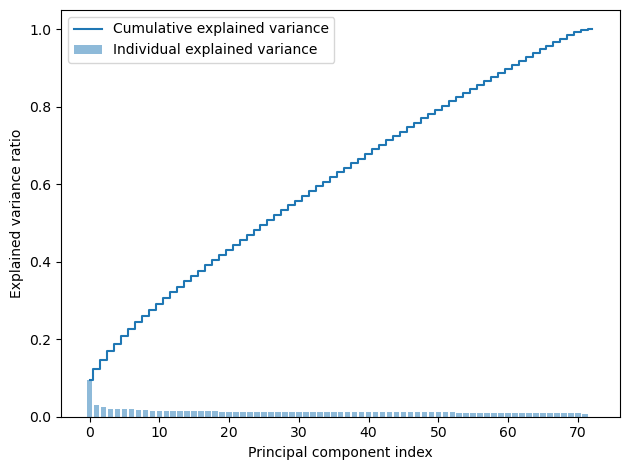

In [84]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [85]:
pca=PCA(n_components=0.7,svd_solver='full')
td_pca=pca.fit_transform(td_norm)

In [87]:
td_pca.shape

(53845, 43)

In [98]:
X=td_pca
y=df.Star

lr = LogisticRegression()

cv_score_lr=cross_val_score(lr, X, y, cv=5)

np.mean(np.array(cv_score_lr))

0.47937598662828484

In [99]:
rf=RandomForestClassifier()
cv_score_rf=cross_val_score(rf, X, y, cv=5)
np.mean(np.array(cv_score_rf))

0.46043272355836196

## Perform K-fold CV

In [43]:
X=td
y=df.Star


In [52]:
lr = LogisticRegression()

In [54]:
cv_score_lr=cross_val_score(lr, X, y, cv=5)

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [55]:
np.mean(np.array(cv_score_lr))

0.48622899062122765

In [58]:
rf=RandomForestClassifier()

In [60]:
cv_score_rf=cross_val_score(rf, X, y, cv=5)

In [61]:
np.mean(np.array(cv_score_rf))

0.46033986442566627

In [89]:
f_n = open("negative_words.txt", "r")
Negative_words = f_n.readlines()
f_p = open("positive_words.txt", "r")
Positive_words = f_p.readlines()
Voca = [i.rstrip('\n') for i in Positive_words] + [i.rstrip('\n') for i in Negative_words]
vectorizer = CountVectorizer(vocabulary=np.unique(Voca))
X = vectorizer.fit_transform(documents)

In [90]:
td2 = pd.DataFrame(X.todense()) 
td2.columns = vectorizer.get_feature_names()

/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [74]:
td2=td2.loc[:, (td2 != 0).any(axis=0)]

In [91]:
td2

,2-faced,2-faces,a+,abnormal,abolish,abominable,abominably,abominate,abomination,abort,...,zapped,zaps,zeal,zealot,zealous,zealously,zenith,zest,zippy,zombie
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
sc2 = StandardScaler()
sc2.fit(td2)
td_norm2=sc2.transform(td2)

pca2=PCA()
td_pca2=pca2.fit_transform(td_norm2)

exp_var_pca2 = pca2.explained_variance_ratio_
cum_sum_eigenvalues2 = np.cumsum(exp_var_pca2)

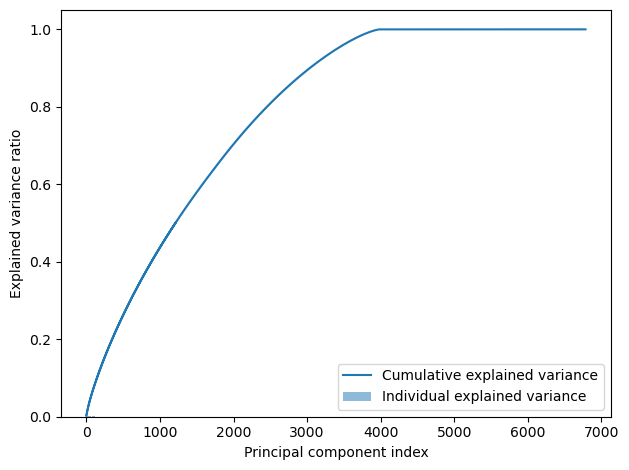

In [96]:
plt.bar(range(0,len(exp_var_pca2)), exp_var_pca2, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues2)), cum_sum_eigenvalues2, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [97]:
pca2=PCA(n_components=0.7,svd_solver='full')
td_pca2=pca2.fit_transform(td_norm2)
td_pca2.shape

(53845, 1986)

In [100]:
X=td_pca2
y=df.Star

lr = LogisticRegression()

cv_score_lr=cross_val_score(lr, X, y, cv=5)

np.mean(np.array(cv_score_lr))

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

0.5155353328999908

In [101]:
rf=RandomForestClassifier()
cv_score_rf=cross_val_score(rf, X, y, cv=5)
np.mean(np.array(cv_score_rf))

0.4765902126474139

## Grid Search

In [103]:
X_train, X_test, y_train, y_test = train_test_split(td_pca2, y, test_size=0.2)

In [102]:
param_grid = {
    'n_estimators': [100, 250, 500],
    'min_samples_split': [2, 3, 4]
}

In [106]:
gs_rf = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=3)

In [107]:
gs_rf.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
gs_rf.best_params_

In [ ]:
gs_rf.score(X_test, y_test)

In [76]:
X2=td2

In [77]:
cv_score_lr2=cross_val_score(lr, X2, y, cv=5)

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [78]:
np.mean(np.array(cv_score_lr2))

0.5312842418051815

In [79]:
rf=RandomForestClassifier(max_depth=100)

In [80]:
cv_score_rf2=cross_val_score(rf, X2, y, cv=5)

In [81]:
np.mean(np.array(cv_score_rf2))

0.5034636456495496